In [50]:
import re
import os
import sys
import numpy as np 
import pandas as pd
import seaborn as sns
from statistics import mean
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from Bio.Align import AlignInfo, MultipleSeqAlignment
from Bio import SeqIO, pairwise2, AlignIO
from collections import Counter, OrderedDict, namedtuple
from contextlib import redirect_stdout

import importlib
from Sequence import Sequence
from Evaluation.DfamEvaluation import DfamEvaluation
from Util.FragmentUtil import fragmentLenPlot, lengthScatterDistributionPlot
from Util.SeqUtil import seqInfo, parseFasta, parseSeqByCutter, seqFileGenerator
from DataInfo import currDatasetName, currDataset, datasetPath, matchPattern, cutterA, cutterB, fragmentN, commonCount, chrPattern
from RepeatFinder import findRepeatSeqs, integrateRepeatInfo, getIRComb, evaluateRepeat, generateIROutputFile, checkTandemRepeatExist, generateTROutputFile, generateFragmentOutputFile, filterRepeatInfo, commonRepeatFragLenTable
# importlib.reload(sys.modules['Evaluation'])

In [2]:
currDatasetName = "chrX_dm6"

In [3]:
seqA = Sequence(cutterA)
parseFastaA = seqA.parseFasta()
fragmentLenListA, fragmentSeqListA = seqA.parseSeqByCutter()
repeatInfoListA = seqA.findRepeatSeqs()

...start parsing dm6/chrX_sequence.fasta fasta file ...
...cost0.15295171737670898 sec to parse fasta file ...
...start parse seq by cutter: GATC
...cost 0.26816415786743164 sec to cut sequence
... start finding repeat seq ...
...cost0.10721373558044434 sec to finding repeat seq  ...


In [4]:
seqB = Sequence(cutterB)
parseFastaB = seqB.parseFasta()
fragmentLenListB, fragmentSeqListB = seqB.parseSeqByCutter()
repeatInfoListB = seqB.findRepeatSeqs()

...start parsing dm6/chrX_sequence.fasta fasta file ...
...cost0.11624717712402344 sec to parse fasta file ...
...start parse seq by cutter: AAGCTT
...cost 0.316356897354126 sec to cut sequence
... start finding repeat seq ...
...cost0.005738019943237305 sec to finding repeat seq  ...


In [5]:
seqInfo(currDatasetName, parseFastaA)

chrX_dm6 dataset
 number of sequence:1
 total length:23542271



In [6]:
repeatInfoList = repeatInfoListA + repeatInfoListB

In [7]:
hitFileName = f"{currDatasetName}_dfam.nrph.hits"

In [8]:
dfam = DfamEvaluation(repeatInfoList)

In [9]:
repeatPositionList = dfam.getRepeatPositionList()
repeatPositionLookupDic = dfam.positionBucketClassifier()
dfamPositionList = dfam.getDfamPositionList()

In [10]:
len(repeatPositionList)

69683

In [11]:
DRrepeatMatchList, DRmatchedFamilyAccList, DRmatchedFamilyNameList = dfam.checkDfamMatchWithRepeat()

In [12]:
# from repeat , check Dfam
# RDrepeatMatchList, RDmatchedFamilyAccList, RDmatchedFamilyNameList = dfam.checkRepeatMatchWithDfam()

In [13]:
dfam.familyMatchRatio(DRmatchedFamilyAccList)
dfam.matchRatio(DRrepeatMatchList)

Family Match Result:
matchCount:55	dfamCount:55	Ratio:1.0
unmatch acc: set()
matchCount:580	dfamCount:602	Ratio:0.9634551495016611


0.9634551495016611

In [41]:
unMatchDf = dfam.getUnmatchInfo(DRrepeatMatchList)

<AxesSubplot:>

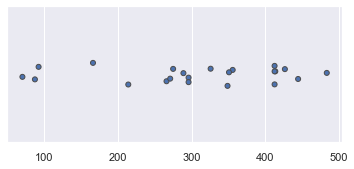

In [58]:
lengthScatterDistributionPlot(list(unMatchDf["length"]))

In [20]:
# Test cutter A
# dfamA = DfamEvaluation(repeatInfoListA)
# repeatPositionListA = dfamA.getRepeatPositionList()
# repeatPositionLookupDicA = dfamA.positionBucketClassifier()
# dfamPositionListA = dfamA.getDfamPositionList()
# dfamPositionLookupDicA = dfamA.positionBucketClassifier()
# DRrepeatMatchListA, DRmatchedFamilyAccListA, DRmatchedFamilyNameListA = dfamA.checkDfamMatchWithRepeat()

In [ ]:
# totalLen = len(DRrepeatMatchListA)
# matchLenA = len(list(filter(lambda x: x, DRrepeatMatchListA)))
# ratio = matchLenA / totalLen
# print(f"matchCount:{matchLenA}\tdfamCount:{totalLen}\tRatio:{ratio}")

matchCount:569	dfamCount:602	Ratio:0.9451827242524917


In [ ]:
# Test cutter B
# dfamB = DfamEvaluation(repeatInfoListB)
# repeatPositionListB = dfamB.getRepeatPositionList()
# repeatPositionLookupDicB = dfamB.positionBucketClassifier()
# dfamPositionListB = dfamB.getDfamPositionList()
# dfamPositionLookupDicB = dfamB.positionBucketClassifier()
# DRrepeatMatchListB, DRmatchedFamilyAccListB, DRmatchedFamilyNameListB = dfamB.checkDfamMatchWithRepeat()

In [ ]:
# totalLen = len(DRrepeatMatchListB)
# matchLenB = len(list(filter(lambda x: x, DRrepeatMatchListB)))
# ratio = matchLenB / totalLen
# print(f"matchCount:{matchLenB}\tdfamCount:{totalLen}\tRatio:{ratio}")

matchCount:255	dfamCount:602	Ratio:0.42358803986710963


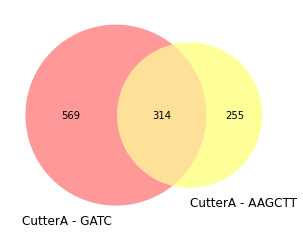

In [ ]:
# venn2(subsets = (matchLenA, matchLenB, matchLenA-matchLenB), set_labels = ('CutterA - GATC ', 'CutterA - AAGCTT'), set_colors=('red', 'yellow'))